In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
# from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
df1 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')
df2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')

In [4]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.70
1,Afghanistan,AFG,1991,1.73
2,Afghanistan,AFG,1992,1.79
3,Afghanistan,AFG,1993,1.78
4,Afghanistan,AFG,1994,1.71


In [5]:
df2.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44
1,Afghanistan,AFG,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44
2,Afghanistan,AFG,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45
3,Afghanistan,AFG,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45
4,Afghanistan,AFG,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45


In [7]:
df1.isnull()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6835,False,False,False,False
6836,False,False,False,False
6837,False,False,False,False
6838,False,False,False,False


In [8]:
df1.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
dtype: int64

In [9]:
df2.isnull()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7105,False,False,False,False,False,False,False,False,False,False
7106,False,False,False,False,False,False,False,False,False,False
7107,False,False,False,False,False,False,False,False,False,False
7108,False,False,False,False,False,False,False,False,False,False


In [10]:
df2.isnull().sum()

Entity                                                                                 0
Code                                                                                 960
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    690
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          690
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           690
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          690
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)        270
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       690
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)     270
dtype: int64

In [ ]:
"""
numeric_columns = df1.select_dtypes(include=[np.number]).columns

This line selects the columns of df1 that have numeric data types (np.number). 
It identifies the numeric columns based on their data type.
The columns attribute returns the column names of the selected numeric columns.
The resulting column names are stored in the numeric_columns variable.
"""

In [11]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())

In [12]:
df2.isnull().sum()

Entity                                                                                 0
Code                                                                                 960
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)          0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)       0
dtype: int64

In [14]:
df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'] = df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].astype(float)
df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)

In [25]:
df1.dtypes

Entity                                                                                              object
Code                                                                                                object
Year                                                                                                 int64
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)    float64
dtype: object

In [26]:
df2.dtypes

Entity                                                                                object
Code                                                                                  object
Year                                                                                   int64
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    float64
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          float64
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           float64
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          float64
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)        float64
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       float64
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)     float64
dtype: object

In [15]:
merged_df = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'])

In [16]:
merged_df.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.70,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44
1,Afghanistan,AFG,1991,1.73,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44
2,Afghanistan,AFG,1992,1.79,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45
3,Afghanistan,AFG,1993,1.78,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45
4,Afghanistan,AFG,1994,1.71,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45


In [19]:
merged_df.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized                    0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized                          0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized                           0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized                          0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Depressive disorders (share of population) - Sex: Both - Age: Age-standar

In [20]:
merged_df.describe()

,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,4.818070,0.266089,0.638225,0.195017,4.099019,0.746728,3.766256,1.578845
std,8.656074,2.294064,0.037226,0.223310,0.131850,1.005715,0.463010,0.890957,0.934629
min,1990.000000,0.220000,0.188416,0.181667,0.044780,1.879996,0.230000,1.522333,0.320000
25%,1997.000000,3.010000,0.248903,0.526408,0.099126,3.495719,0.420000,3.110812,0.730000
50%,2004.500000,4.680000,0.270205,0.608044,0.159115,4.000702,0.650000,3.767036,1.460000
75%,2012.000000,6.390000,0.284373,0.819255,0.221340,4.429587,0.890000,4.287619,2.260000
max,2019.000000,13.760000,0.462045,1.506730,1.031688,8.624634,3.700000,7.645899,4.700000


In [22]:
X = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']]

y = merged_df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']

In [27]:
X.head()

,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44
1,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44
2,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45
3,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45
4,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45


In [28]:
X.dtypes

Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    float64
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          float64
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           float64
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          float64
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)        float64
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       float64
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)     float64
dtype: object

In [29]:
y.dtypes

dtype('float64')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.head()

,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
2251,0.261788,0.750007,0.381828,5.955482,0.87,3.177991,2.71
977,0.212230,0.534474,0.104823,3.184386,0.43,4.623736,0.58
809,0.277643,1.111853,0.232411,7.410114,1.11,3.801556,2.96
2436,0.260243,0.800761,0.168097,4.086142,0.40,3.971960,4.14
2228,0.270267,0.525731,0.095715,2.533934,0.46,3.247793,2.19


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([6.6844542 , 9.1250782 , 6.17311039, ..., 6.9498616 , 4.50375005,
       7.27876979])

In [36]:
model.score(X_test, y_test)

0.6328092497921176

In [38]:
# Create a dictionary to store the model performance
model_performance = {}

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2}

# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2}

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)
model_performance['3. Elastic Net Regression'] = {'MSE': elastic_net_mse, 'R-squared': elastic_net_r2}

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)
model_performance['4. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['5. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
model_performance['7. Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}

# XGBoost Regression
# xgb_model = XGBRegressor()
# xgb_model.fit(X_train, y_train)
# xgb_y_pred = xgb_model.predict(X_test)
# xgb_mse = mean_squared_error(y_test, xgb_y_pred)
# xgb_r2 = r2_score(y_test, xgb_y_pred)
# model_performance['8. XGBoost Regression'] = {'MSE': xgb_mse, 'R-squared': xgb_r2}

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
model_performance['9. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_y_pred = bayesian_model.predict(X_test)
bayesian_mse = mean_squared_error(y_test, bayesian_y_pred)
bayesian_r2 = r2_score(y_test, bayesian_y_pred)
model_performance['10. Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
model_performance['11. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
model_performance['12. Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2}

# Print model performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()

Model: 1. Ridge Regression
   Mean Squared Error (MSE): 1.8852828652623428
   R-squared Score: 0.6309285836156879

Model: 2. Lasso Regression
   Mean Squared Error (MSE): 3.674451184301676
   R-squared Score: 0.2806729812205011

Model: 3. Elastic Net Regression
   Mean Squared Error (MSE): 3.4451550539587945
   R-squared Score: 0.325561018531185

Model: 4. Polynomial Regression
   Mean Squared Error (MSE): 1.1568022548912704
   R-squared Score: 0.773539210186437

Model: 5. Decision Tree Regression
   Mean Squared Error (MSE): 0.17545730502761536
   R-squared Score: 0.9656516922342551

Model: 6. Random Forest Regression
   Mean Squared Error (MSE): 0.07890497227477637
   R-squared Score: 0.9845532092749572

Model: 7. Support Vector Regression
   Mean Squared Error (MSE): 1.7461862488419992
   R-squared Score: 0.6581587601491058

Model: 9. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 0.10942580994152047
   R-squared Score: 0.9785783134147895

Model: 10. Bayesian Regression

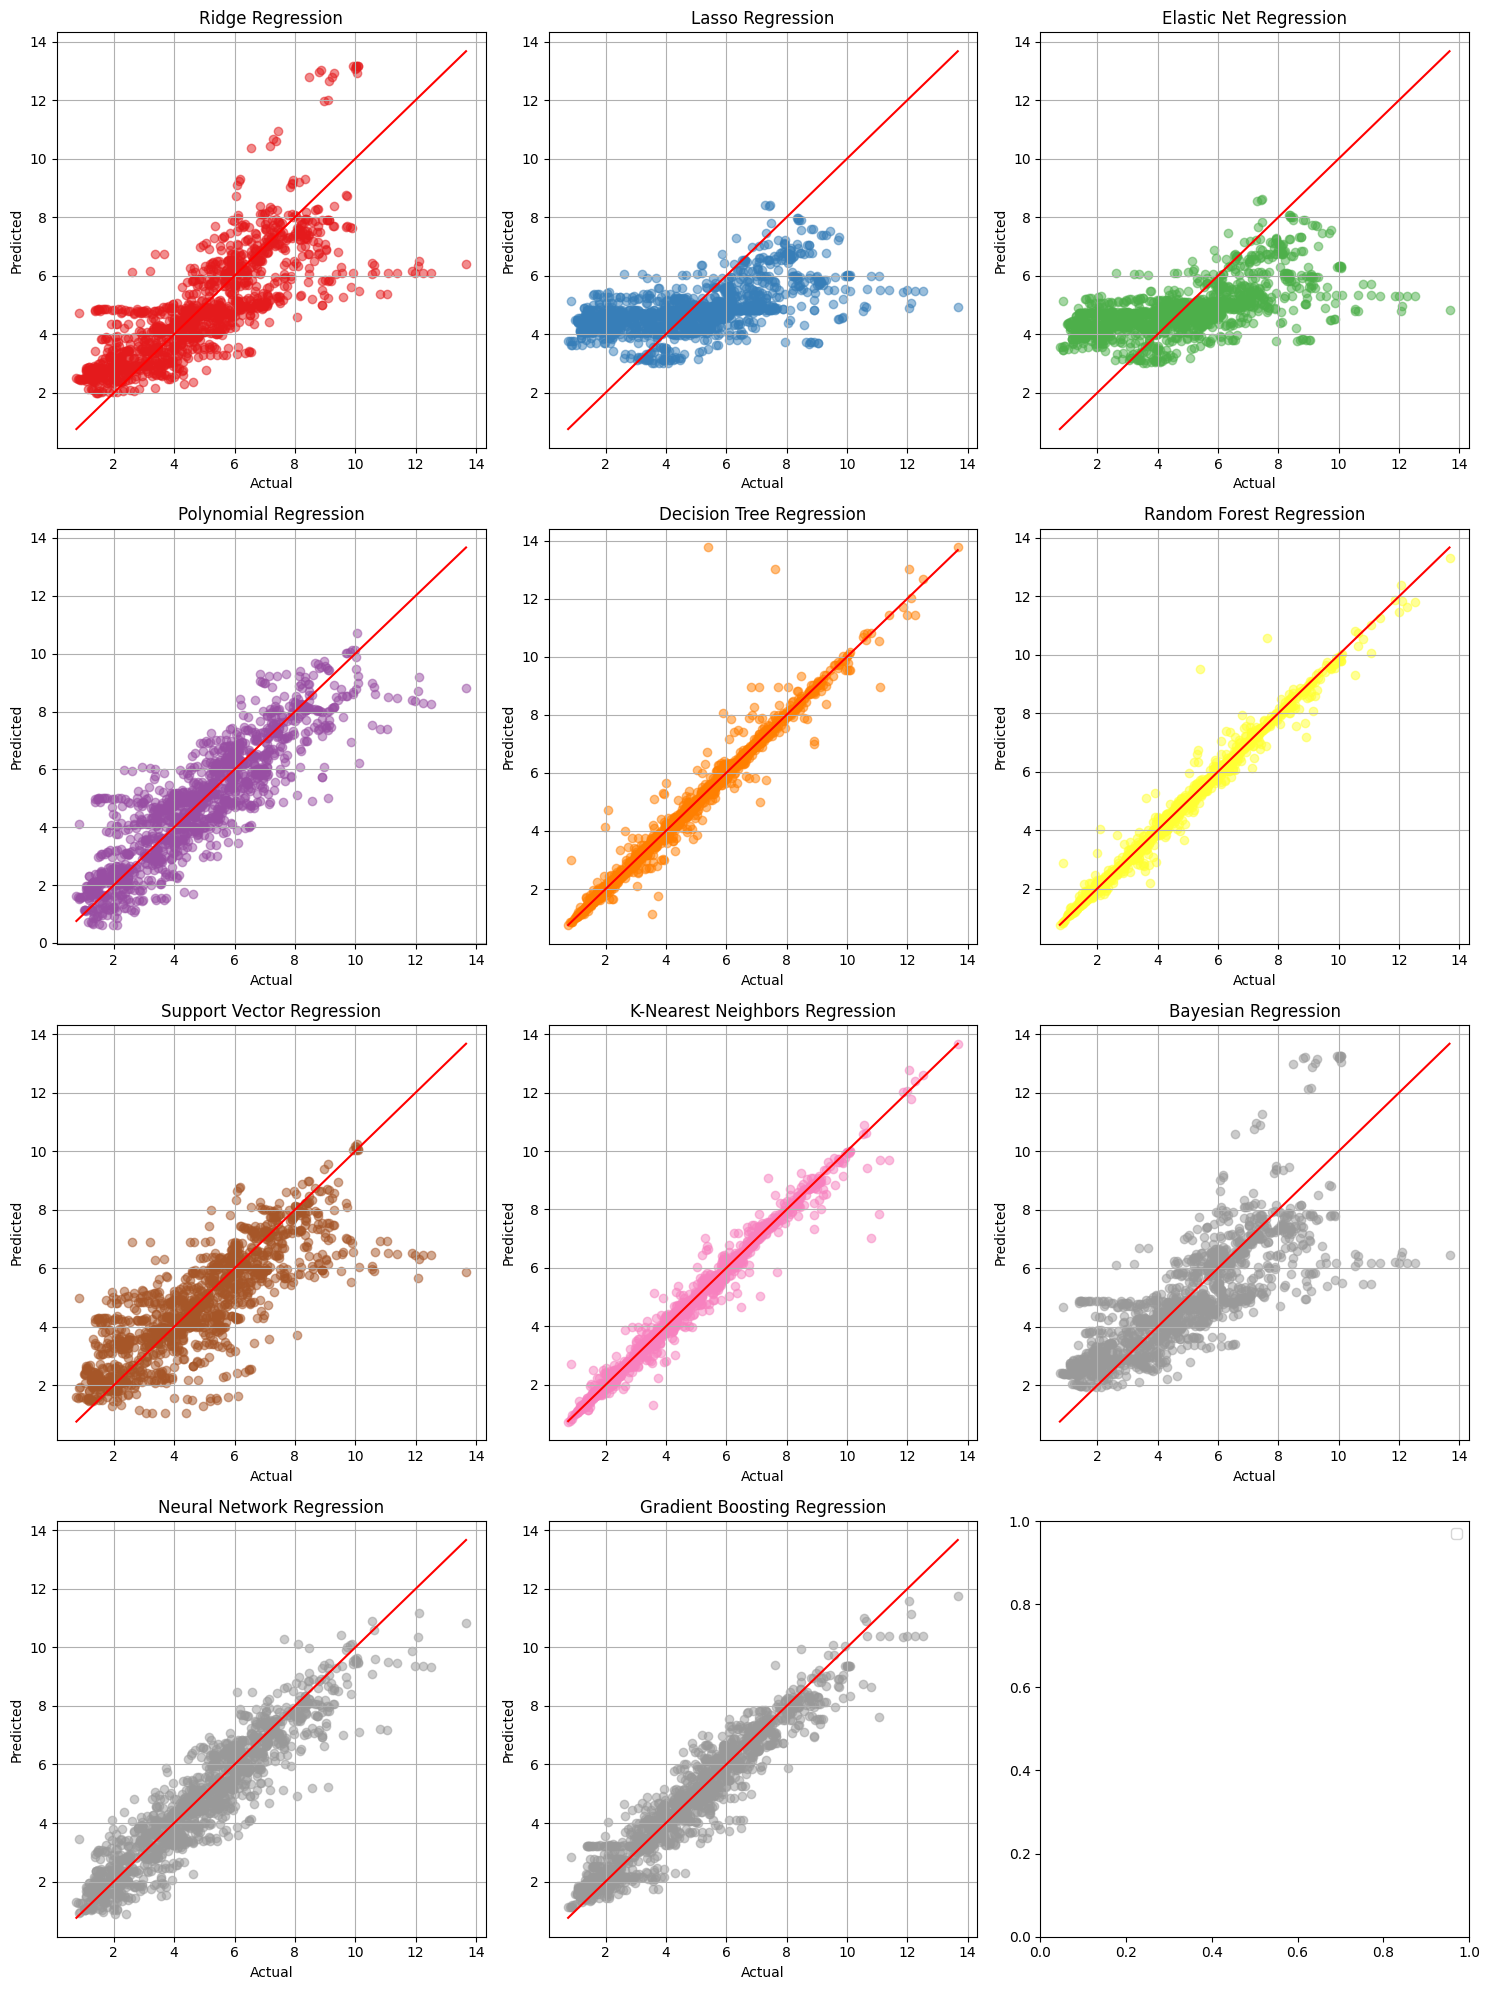

In [40]:
# Create a dictionary to store the model performance
model_performance = {
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': y_test},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': y_test},
    'Elastic Net Regression': {'Predicted': elastic_net_y_pred, 'Actual': y_test},
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
#    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': y_test}
}

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=color_palette[i], alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()

In [47]:
print("Best Performing Model\nRandom Forest Regression:\n")
model_performance['Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}
print(model_performance['Random Forest Regression'])

Best Performing Model
Random Forest Regression:

{'MSE': 0.07890497227477637, 'R-squared': 0.9845532092749572}
